# Transfer Functions and Impulse Responses

In [1]:
import sympy as sp

# improve sympy display setting
sp.init_printing()

def L(f):
    return sp.laplace_transform(f,t,s, noconds=True)

def invL(F):
    return sp.inverse_laplace_transform(F,s,t)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cplot # warning: this is my "homebrew verion" of cplot (the only thing I've changed is fontsize and some labels), so on your machine
# it may appear differently

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%config InlineBackend.figure_format='retina'

# Finally, print nice Latex labels for figures. 
# Comment these out if you don't want to wait for the tex to compile, or don't
# want to bother get tex working. 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# also, we should manually set the dpi for figures so they look good
# if saving figs, you should do so at a much higher dpi!
dpi = 300
plt.rcParams['figure.dpi']= dpi

In [3]:
# Define symbols for time and frequency
t, s = sp.symbols('t,s')

In [4]:
# Create a callable function that returns the transfer function  of an LTI system
def tf(A,B,C): # get symbolic rep. of  transfer function 
    k = A.shape[0]
    RA = (s*sp.eye(k) - A).inv() # get resolvent of A
    H = C*RA*B
    return H

Let's test this code out on a damped oscillator.

In [5]:
w = sp.symbols('\omega_0', real=True)
z = sp.symbols('\zeta', real=True)
b = sp.symbols('b', real=True)

A = sp.Matrix([[0.,1.],[-w**2, -2*w*z]])
B = sp.Matrix([[0.],[b]])
# make the state-to-output map what you want
#C = sp.eye(2)
C = sp.Matrix([[1.,0]])

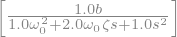

In [6]:
H = tf(A,B,C)
H

To assess the stability of our system, we need to find the roots of the denominator of our transfer function. SymPy can handle this with no trouble:

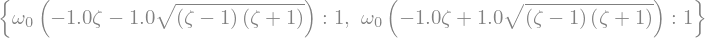

In [7]:
sp.roots(sp.denom(H[0]),s)

In [8]:
# Create a callable function returning the impulse response of an LTI system
def ir(A,B,C):
    return invL(tf(A,B,C))

Again, we test our code on the damped harmonic oscillator. 

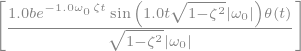

In [9]:
h = ir(A,B,C)
h

This expression can be rendered (albeit imperfectly) in $\LaTeX$ with the right code: uncomment the patch below to see this work. 

In [10]:
#print(sp.latex(ir(A,B,C)))

Now, we discuss Bode Plots of transfer functions. I've packed a convenient function for building Bode plots into the file $\texttt{control\_lib.py}$: just define a transfer function $H(s)$ using a SymPy expression $\texttt{H}$, then call $\texttt{bode(H)}$.  Make sure the .py file is actually in your path! If you want just put it in the same directory as this notebook. 

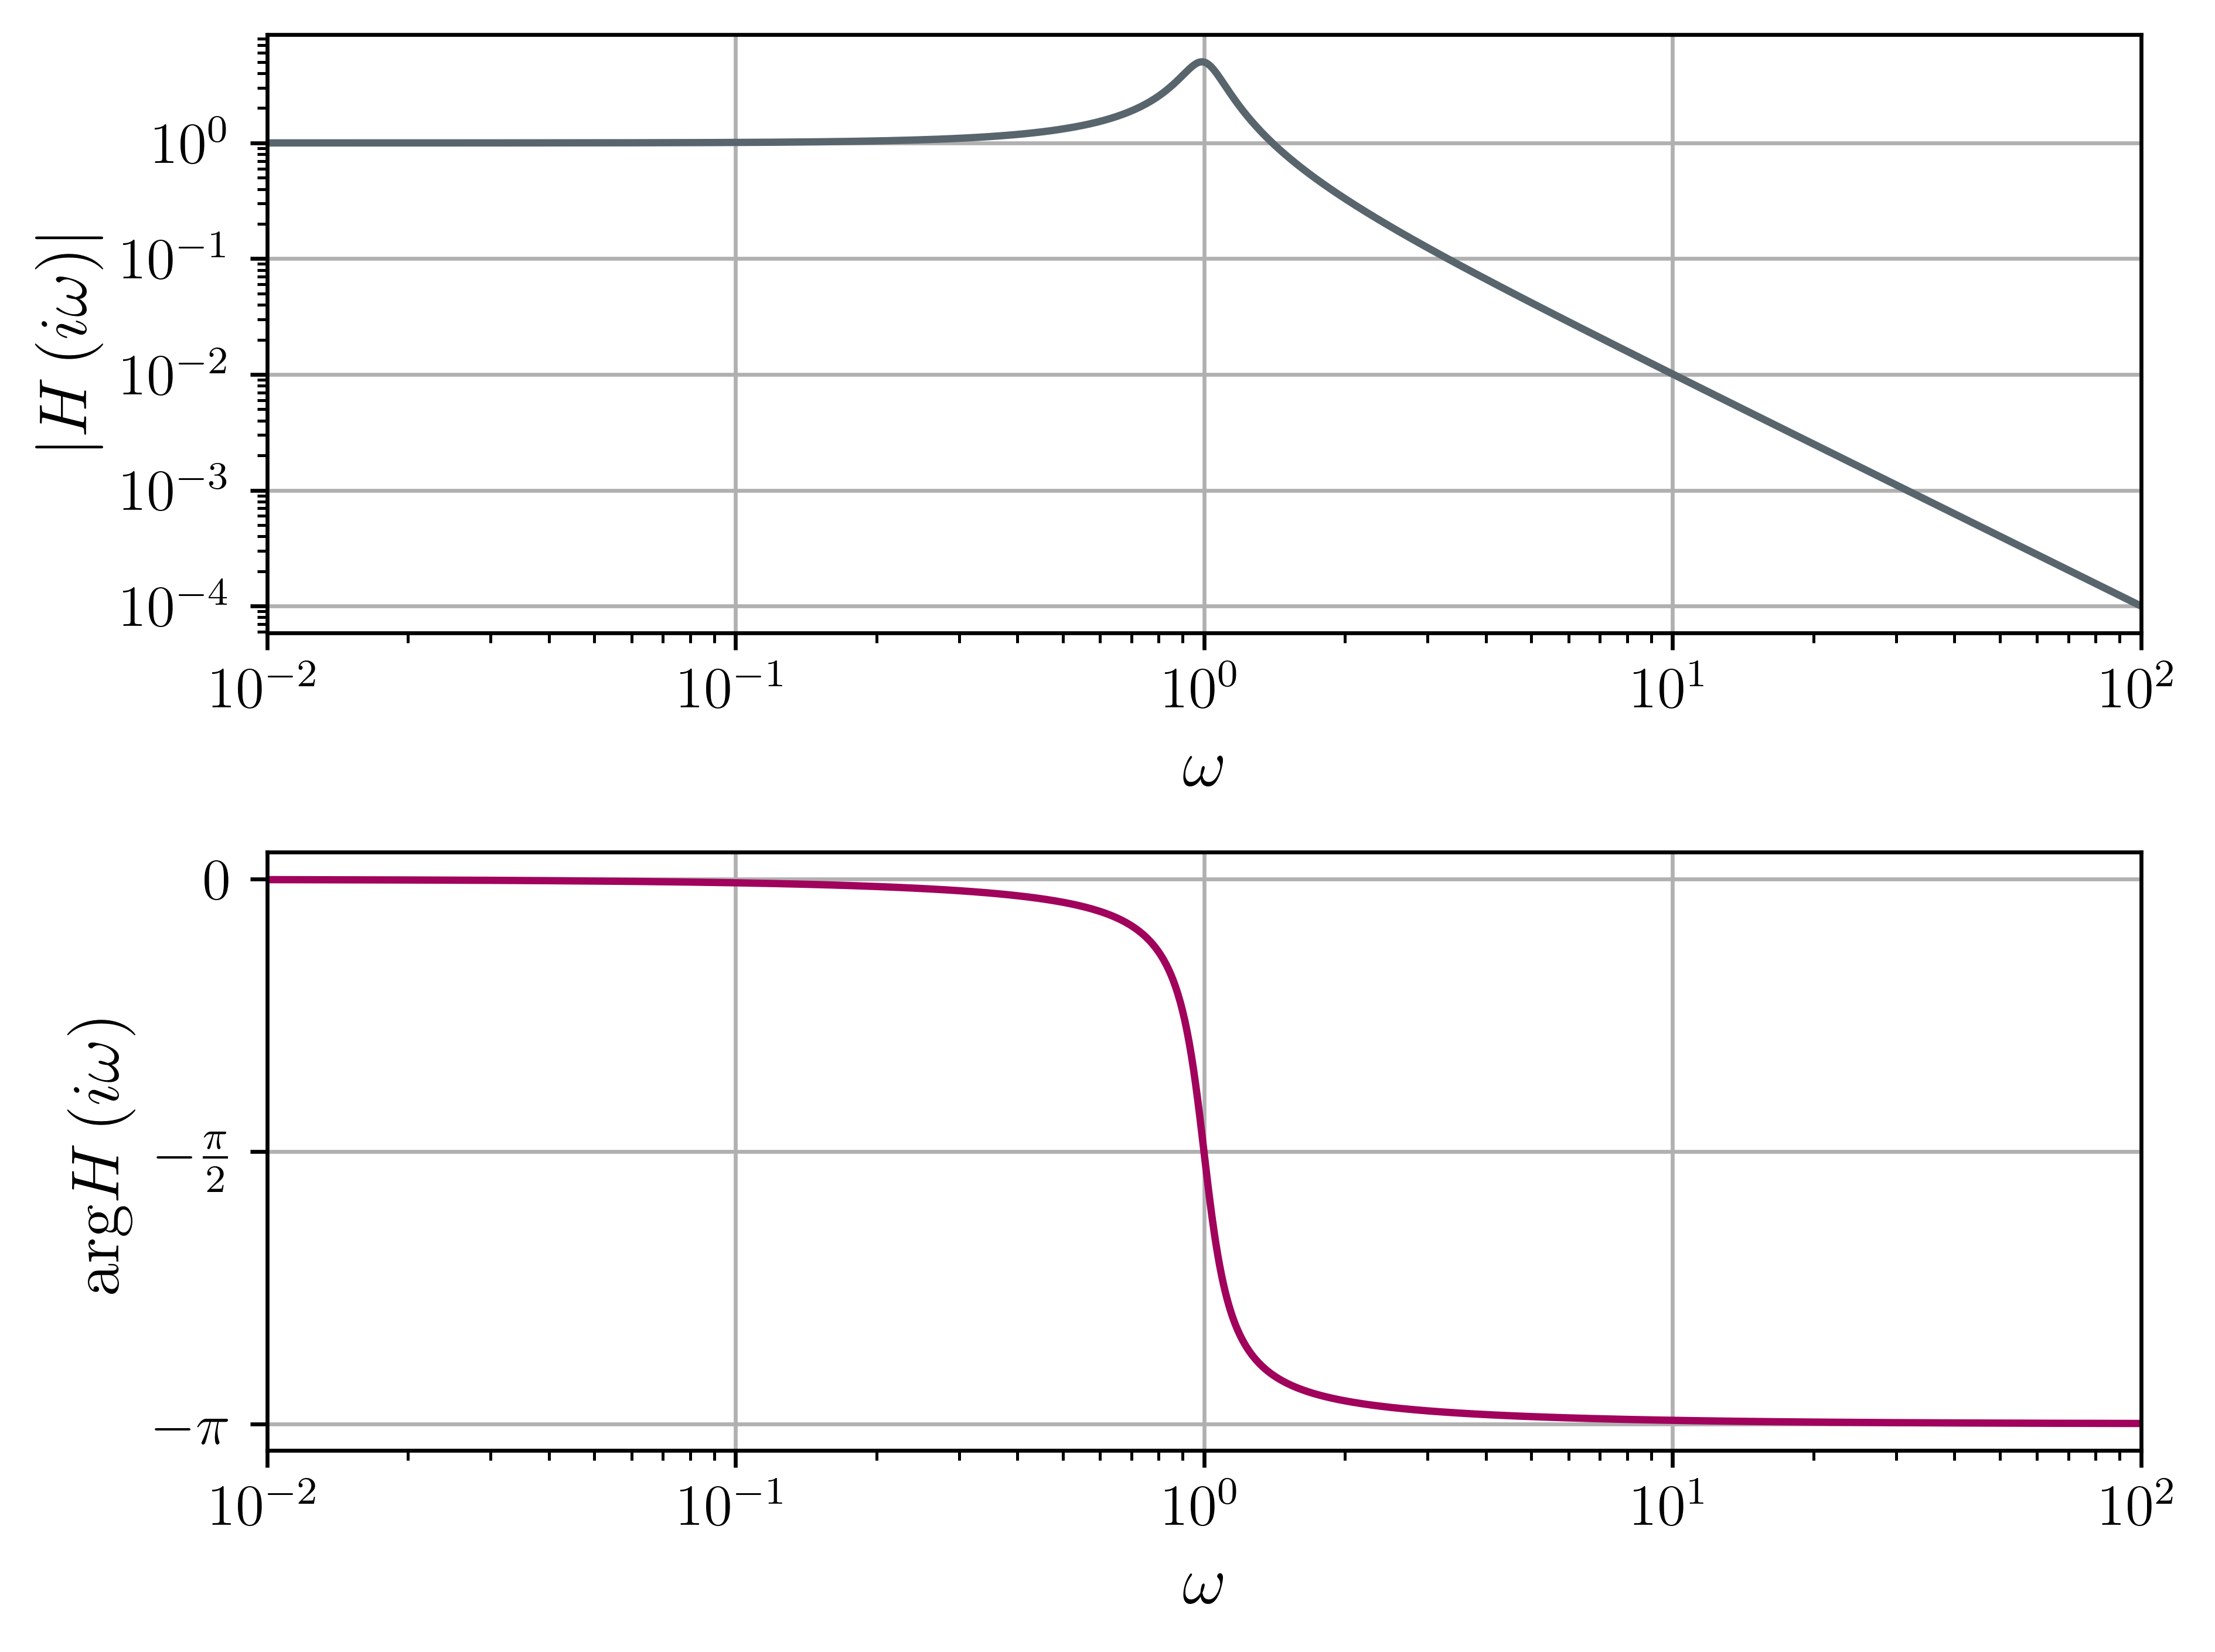

In [11]:
z = .1

A = sp.Matrix([[0.,1.],[-1., -2.*z]])
B = sp.Matrix([[0.],[1.]])
C = sp.Matrix([[1.,0.]])

H = tf(A,B,C)[0]
H

from control_lib import bode

bode(H)